<a href="https://colab.research.google.com/github/Rafikul10/Heart-Disease-ANN/blob/main/Heart_Disease_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libaries





In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing dataset

In [3]:
#Importing the data
df=pd.read_csv("drive/MyDrive/ColabNotebooks/Heart/heart.csv")

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#Observation: From above all operation i checked the data.
#1.Few columns are in object type so, first i 
#will convert all those columns into int type

In [9]:
sex=pd.get_dummies(df["Sex"],drop_first=True)
df=pd.concat([df,sex],axis=1)

In [10]:
df=df.drop(columns={"Sex"},axis=1)

In [11]:
df=df.rename(columns={"M":"Sex"})

In [12]:
#Now let,s create a dummies for ExerciseAngina column

In [13]:
df["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [14]:
ea=pd.get_dummies(df["ExerciseAngina"],drop_first=True)
df=pd.concat([df,ea],axis=1)

In [15]:
df.drop(columns={"ExerciseAngina"},axis=1,inplace=True)
df.rename(columns={"Y":"ExerciseAngina"},inplace=True)

In [16]:
#Now lwt's change ST_Slope column
df["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [17]:
z=pd.get_dummies(df["ST_Slope"],drop_first=True)
z.value_counts()

Flat  Up
1     0     460
0     1     395
      0      63
dtype: int64

In [18]:
#Here we have 3 features in ST_Slope columns so i can't create dummies 
#so, i have to be change the value manually by map function

In [19]:
df["ST_Slope"]=df["ST_Slope"].map({"Flat":1,"Up":2,"Down":3})

In [20]:
#Now let me change RestingECG data

In [21]:
df["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [22]:
df["RestingECG"]=df["RestingECG"].map({"Normal":1,"LVH":2 ,"ST":3})

In [23]:
#Now for ChestPainType columns change the object to int type

In [24]:
df["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [25]:
df["ChestPainType"]=df["ChestPainType"].map({"ASY":1,"NAP":2,"ATA":3,"TA":4})

In [26]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex,ExerciseAngina
0,40,3,140,289,0,1,172,0.0,2,0,1,0
1,49,2,160,180,0,1,156,1.0,1,1,0,0
2,37,3,130,283,0,3,98,0.0,2,0,1,0
3,48,1,138,214,0,1,108,1.5,1,1,0,1
4,54,2,150,195,0,1,122,0.0,2,0,1,0


CORRELATION Checking

In [27]:
corr_df=df.corr()
data_corr=corr_df["HeartDisease"].sort_values(ascending=False)

In [28]:
data_corr

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingECG        0.107628
RestingBP         0.107589
Cholesterol      -0.232741
ST_Slope         -0.397802
MaxHR            -0.400421
ChestPainType    -0.471354
Name: HeartDisease, dtype: float64

In [29]:
#Let's visualize this correlation by plotting

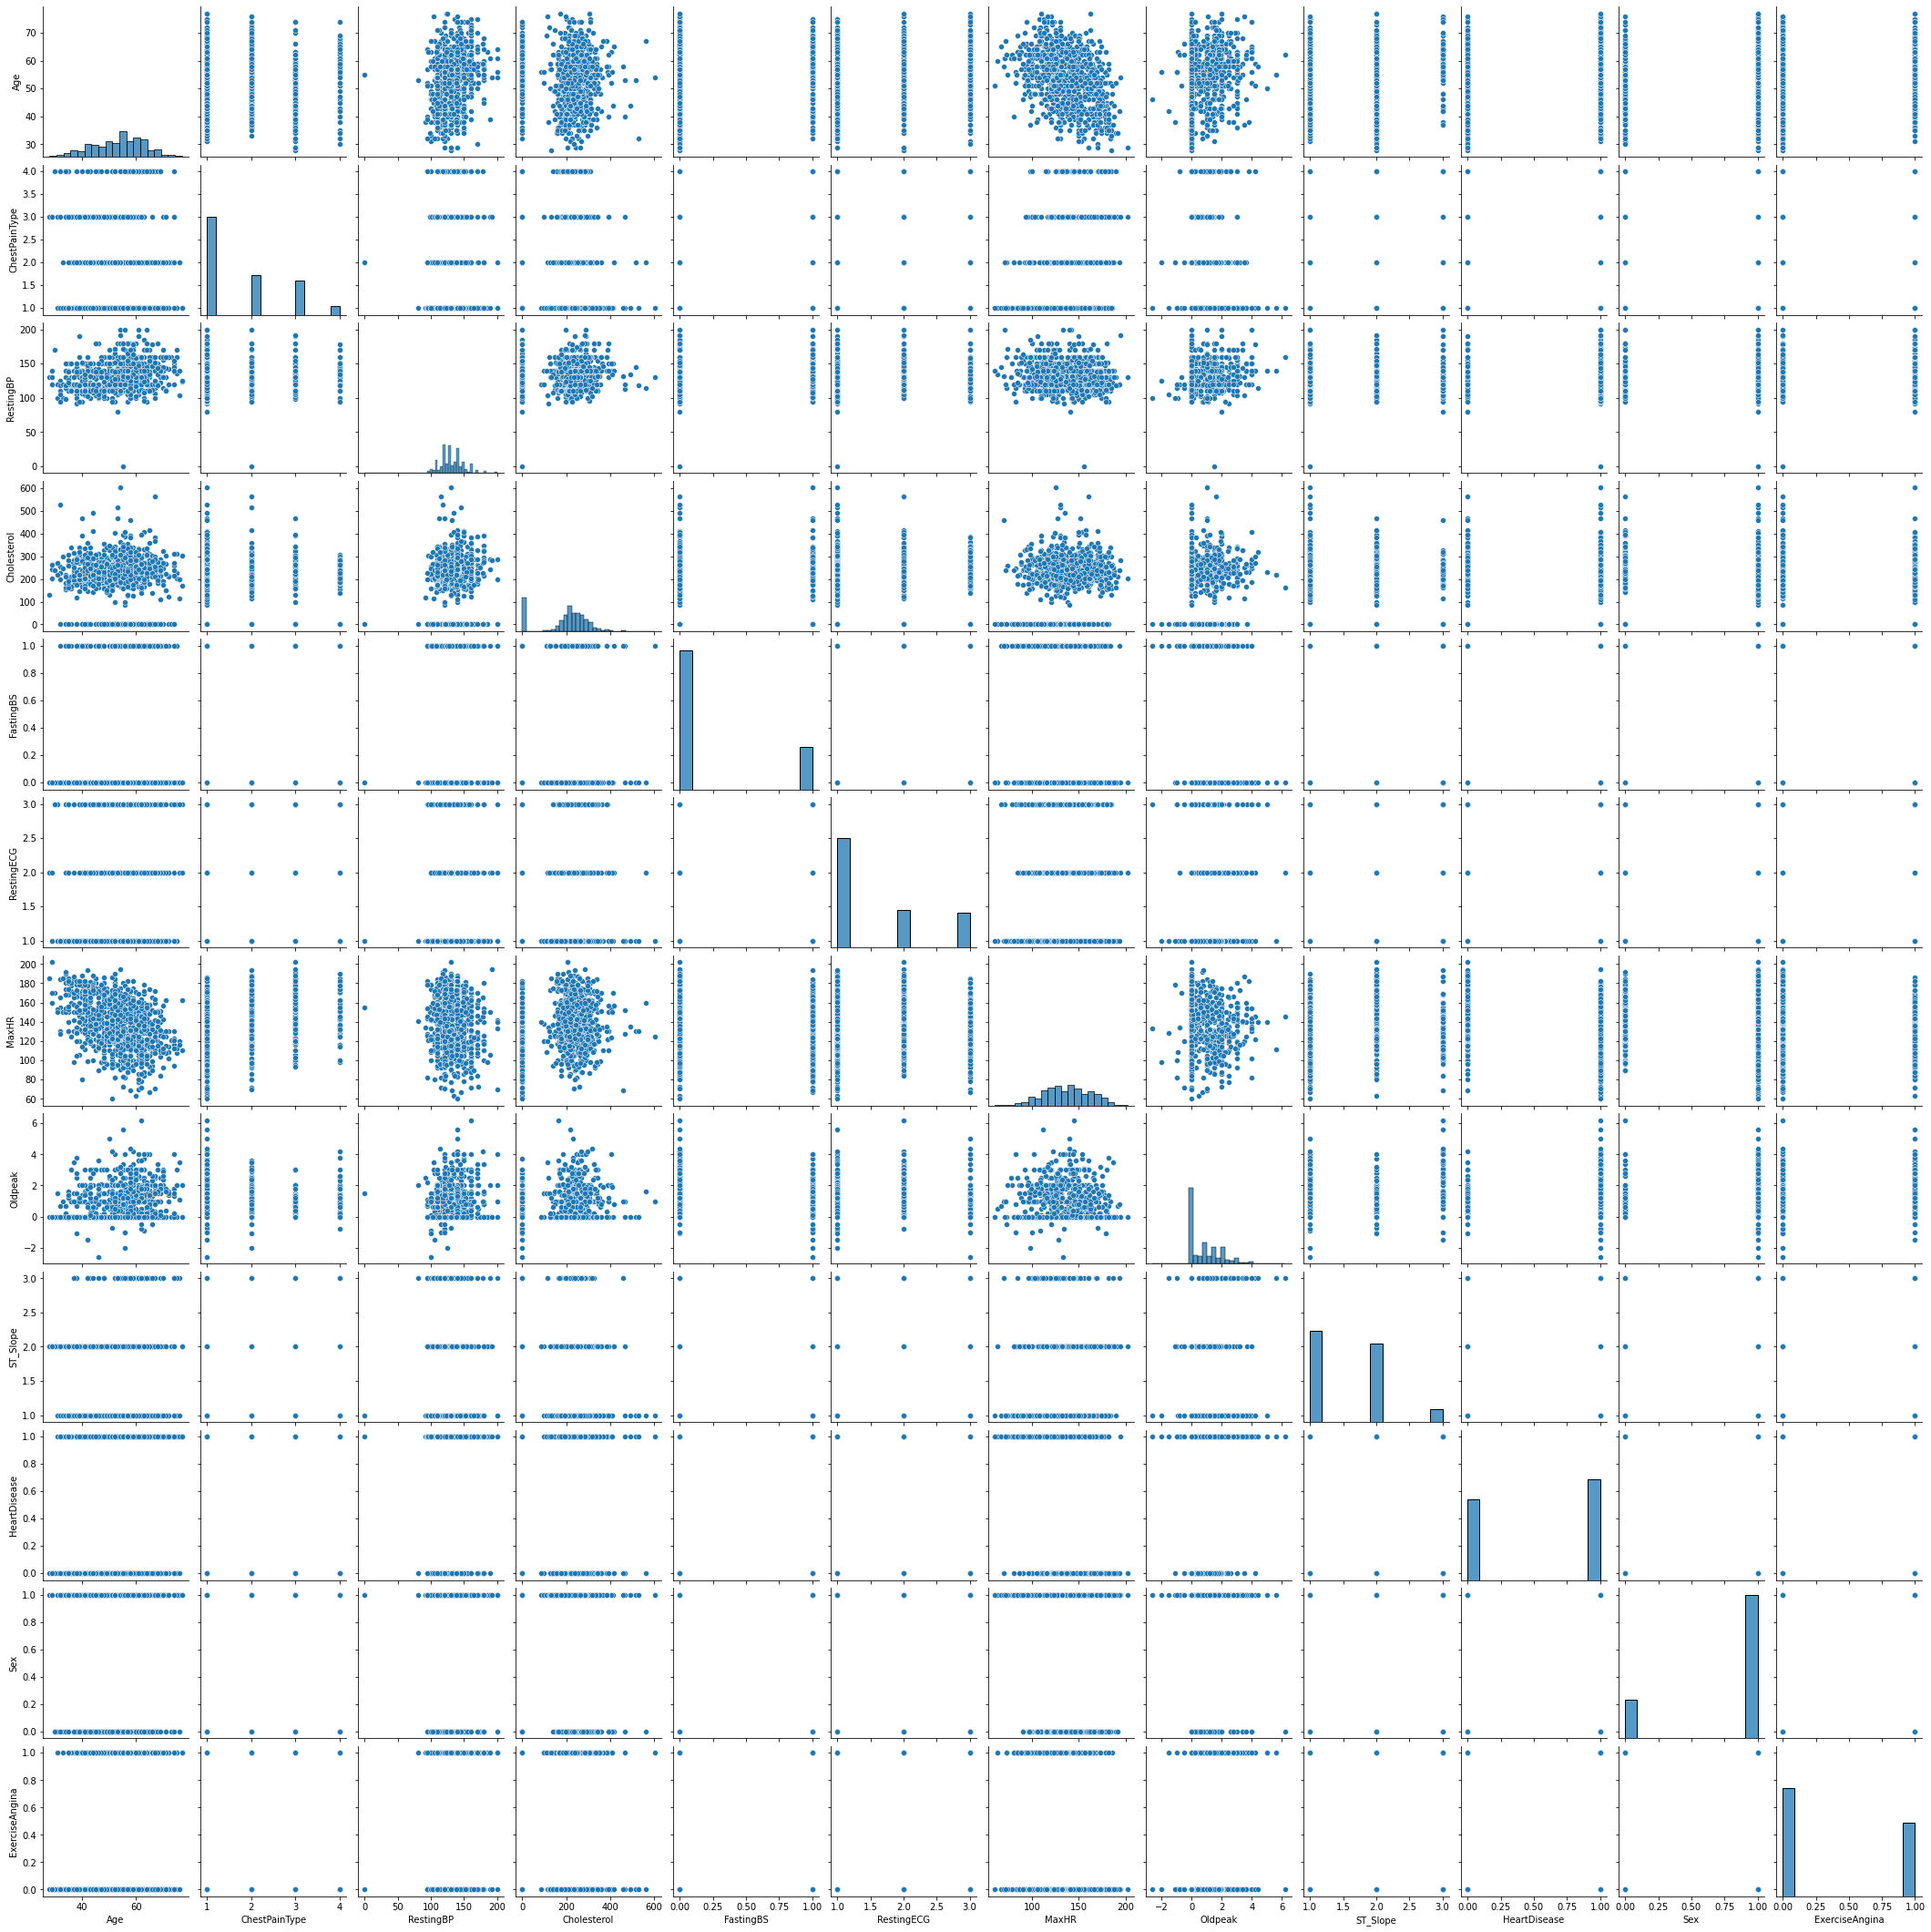

In [30]:
sns.pairplot(df)

In [31]:
#Observation: strong correlation with ExerciseAngina, ChestPainType 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0e24df4d0>,
      dtype=object)

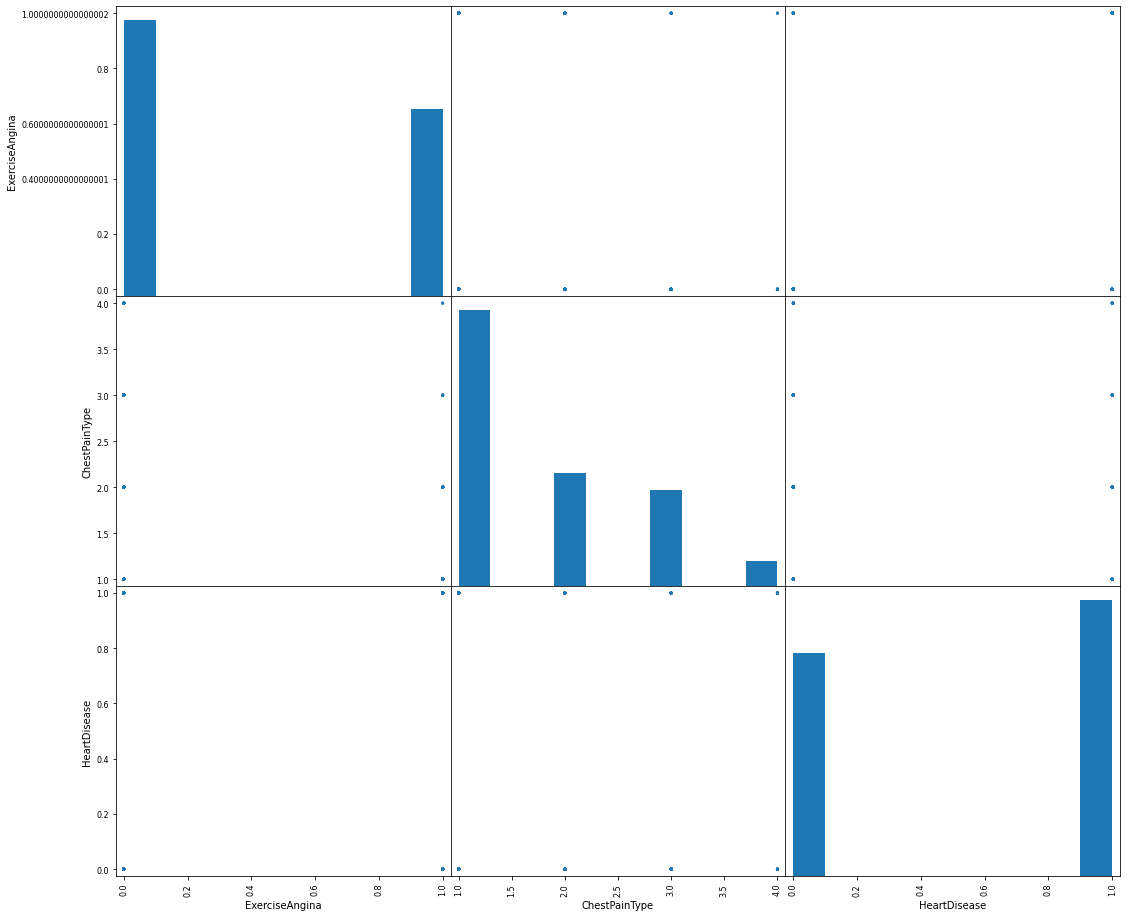

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[["ExerciseAngina","ChestPainType","HeartDisease"]],figsize=(18,16))

In [33]:
#Let me create a new attribute with the help of stronges correlated two column 

In [34]:
df["new"]=df["ChestPainType"]-df["ExerciseAngina"]

In [35]:
cor=df.corr()

In [36]:
cor["HeartDisease"].sort_values(ascending=False)

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingECG        0.107628
RestingBP         0.107589
Cholesterol      -0.232741
ST_Slope         -0.397802
MaxHR            -0.400421
ChestPainType    -0.471354
new              -0.558561
Name: HeartDisease, dtype: float64

In [37]:
#new attribute is more strong correlated with the 
#HeartDisease column so i will use that new column in my model for better resukt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0e874a5d0>,
      dtype=object)

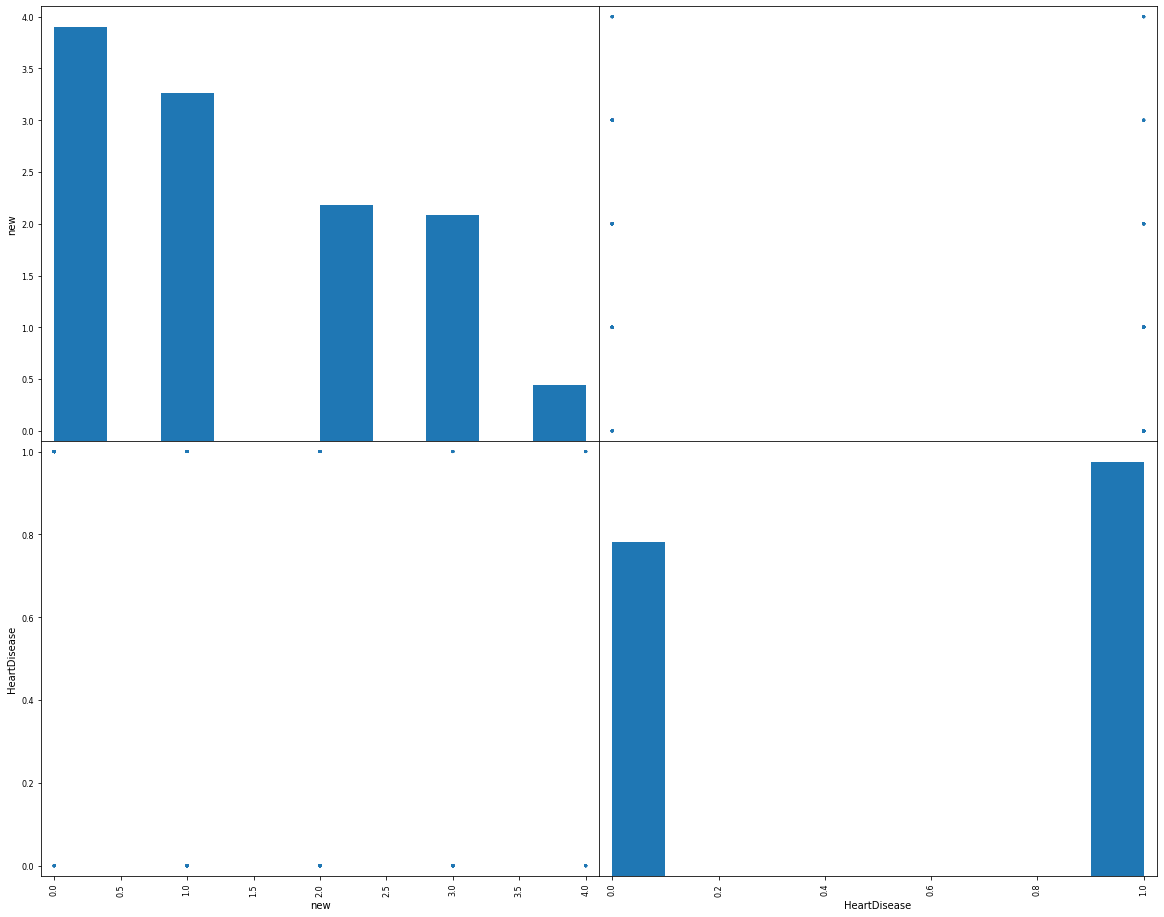

In [38]:
scatter_matrix(df[["new","HeartDisease"]],figsize=(20,16))

Split The Data Inti Train and Test

In [39]:
x=df.drop(columns={"HeartDisease"},axis=1)

In [40]:
y=df.iloc[:,9:-3]

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [42]:
x_test.shape

(184, 12)

In [43]:
y_train.shape

(734, 1)

Features Scealing Process

In [44]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [45]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Hyperparameter Optimizer

In [53]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Embedding, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu,sigmoid

In [47]:
def create_model(layers,activation):
  model = Sequential()
  for i,nodes in enumerate(layers):
    if i==0:
      model.add(Dense(nodes,input_dim=x_train.shape[1]))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
    else:
      model.add(Dense(nodes))
      model.add(Activation(activation))
      model.add(Dropout(0.3))
  model.add(Dense(units=1,kernel_initializer="he_uniform",activation="relu"))

  model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
  return model

In [68]:
model = KerasClassifier(build_fn=create_model,verbose=0)
layers= [[20,40,60],[10,20,30,40]]
activations= ["relu","sigmoid"]
param_grid =dict(layers=layers,activation=activations,batch_size=[240,120],epochs=[100,70,250])
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [69]:
grid_result = grid.fit(x_train,y_train)

In [70]:
print(grid_result.best_score_,grid_result.best_params_)

0.7943155407905579 {'activation': 'relu', 'batch_size': 120, 'epochs': 100, 'layers': [20, 40, 60]}


Importing the keras libaries and packages

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout

In [72]:
Classifier= Sequential()

In [73]:
#Added the input layer and first hidden layer
Classifier.add(Dense(units=20, kernel_initializer="he_uniform" , activation="relu",  input_dim=12))

In [74]:
#adding the second hidden layer 
Classifier.add(Dense(units=40, kernel_initializer = 'he_uniform', activation = 'relu'))

In [75]:
#adding the third hidden layer
Classifier.add(Dense(units=60, kernel_initializer = 'he_uniform', activation = 'relu'))

In [76]:
#Fourth dense layer adding
Classifier.add(Dense(units=1, kernel_initializer = 'he_uniform', activation = 'relu'))

In [77]:
Classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [78]:
model_history=Classifier.fit(x_train,y_train,validation_split=0.33,batch_size=120, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 45ms/step - loss: 2.6823 - accuracy: 0.6191 - val_loss: 1.8114 - val_accuracy: 0.6667
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 1.7317 - accuracy: 0.6986 - val_loss: 2.3485 - val_accuracy: 0.6914
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 1.7894 - accuracy: 0.7251 - val_loss: 2.4261 - val_accuracy: 0.7037
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 1.6849 - accuracy: 0.7658 - val_loss: 2.3494 - val_accuracy: 0.7366
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 1.5567 - accuracy: 0.7780 - val_loss: 2.0450 - val_accuracy: 0.7490
Epoch 6/100
5/5 [==============================] - 0s 8ms/step - loss: 1.4114 - accuracy: 0.7780 - val_loss: 1.9078 - val_accuracy: 0.7654
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 1.4021 - accuracy: 0.7678 - val_loss: 1.7276 - val_accuracy: 0.7613
Epoch 8/100
5/5 [========

In [79]:
y_pred =Classifier.predict(x_test)
y_pred = (y_pred > 0.5)

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [81]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [83]:
accuracy

0.7880434782608695